In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_vali,y_vali) = datasets.cifar10.load_data()
X_train.shape[1:]

(32, 32, 3)

In [3]:
X_vali.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:

y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_vali = y_vali.reshape(-1,)


In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
X_train = X_train / 255.0
X_vali = X_vali / 255.0

In [39]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=86, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [40]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
cnn.fit(X_train, y_train, epochs=10, validation_data=(X_vali, y_vali))

Epoch 1/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.5218 - accuracy: 0.4454 - val_loss: 1.2259 - val_accuracy: 0.5601
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1517 - accuracy: 0.5949 - val_loss: 1.0625 - val_accuracy: 0.6319
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0054 - accuracy: 0.6506 - val_loss: 0.9651 - val_accuracy: 0.6611
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9037 - accuracy: 0.6864 - val_loss: 0.9412 - val_accuracy: 0.6718
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8301 - accuracy: 0.7117 - val_loss: 0.8951 - val_accuracy: 0.6944
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7695 - accuracy: 0.7320 - val_loss: 0.9216 - val_accuracy: 0.6860
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7202 - accuracy: 0.7507 - val_loss: 0.8618 -

In [42]:
vali_loss, vali_acc=cnn.evaluate(X_vali,y_vali)

313/313 [==============================] - 2s 6ms/step - loss: 0.8667 - accuracy: 0.7104


In [43]:
import matplotlib.pyplot as plt
import random

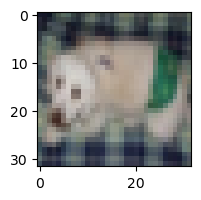

1/1 [==============================] - 0s 27ms/step
This is a:  cat


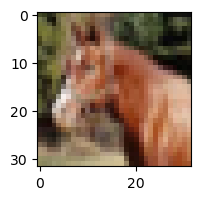

1/1 [==============================] - 0s 20ms/step
This is a:  horse


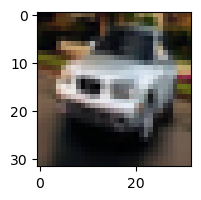

1/1 [==============================] - 0s 28ms/step
This is a:  automobile


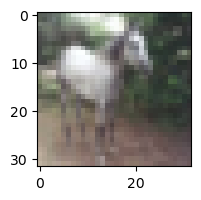

1/1 [==============================] - 0s 20ms/step
This is a:  horse


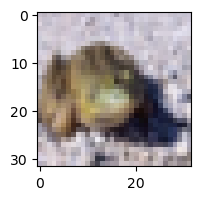

1/1 [==============================] - 0s 21ms/step
This is a:  frog


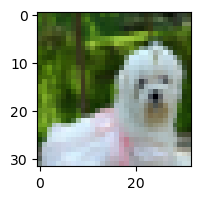

1/1 [==============================] - 0s 20ms/step
This is a:  dog


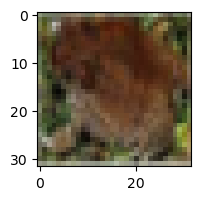

1/1 [==============================] - 0s 21ms/step
This is a:  frog


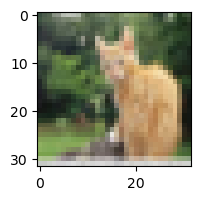

1/1 [==============================] - 0s 20ms/step
This is a:  horse


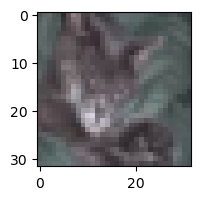

1/1 [==============================] - 0s 27ms/step
This is a:  cat


In [49]:
ans=[]
for i in range(1,10):
    j=random.randint(1,10000)
    plt.figure(figsize = (15,2))
    plt.imshow(X_vali[j])
    plt.show()
    print("This is a: ",classes[np.argmax(cnn.predict(X_vali[j].reshape(-1,32,32,3)))])